# Bike selling count prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv("train_bikes.csv",parse_dates=['datetime'])  ####parse_date to convert object to date time

In [3]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
df.info()                          ## no null values in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
df.shape

(10886, 12)

In [6]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [7]:
df1=df.drop(columns=["count"],axis=1)

In [83]:
import pandas_profiling                   ### full describe report
df1.profile_report()

### Exploratory data analysis

#### 1.Temporal Variables(Eg: Datetime Variables)

In [9]:
def fun(year,df):
 df1=df.copy()  
 df1["datetime"]=df1.loc[df.datetime.dt.year==year,["datetime"]]
 df1.loc[:, ('hour')] = df1.datetime.dt.hour
 hor1= df1.groupby(['hour', 'workingday'])['count'].sum().unstack() # groupby hour and working day
 hor1.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour

In [10]:
df.datetime.dt.year.unique()==2011

array([ True, False])

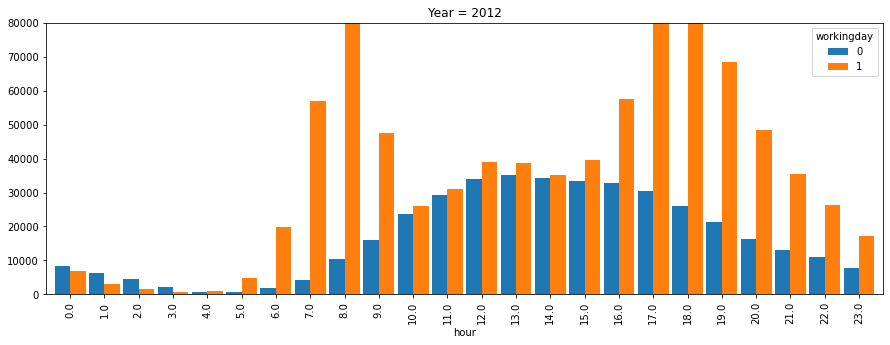

In [11]:
fun(2012,df)

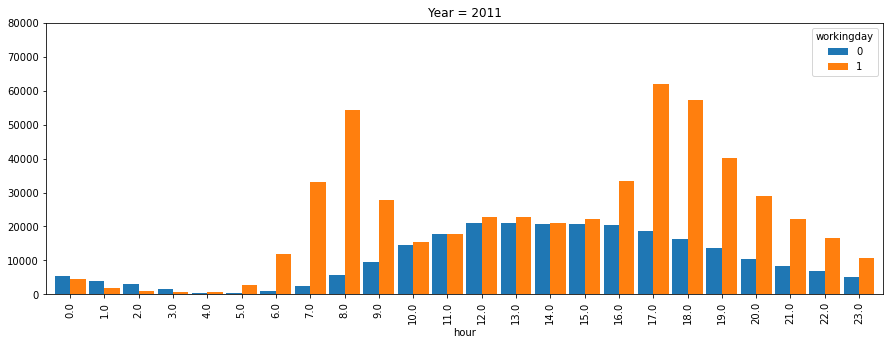

In [12]:
fun(2011,df)

#### based on year

In [13]:
def fun(year,df):
 df1=df.copy()  
 #df1["datetime"]=df1.loc[df.datetime.dt.year==year,["datetime"]]
 df1.loc[:, ('month')] = df1.datetime.dt.month
 df1.loc[:, ('year')] = df1.datetime.dt.year
 hor1= df1.groupby(['month', 'year'])['count'].sum().unstack() # groupby hour and working day
 hor1.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour

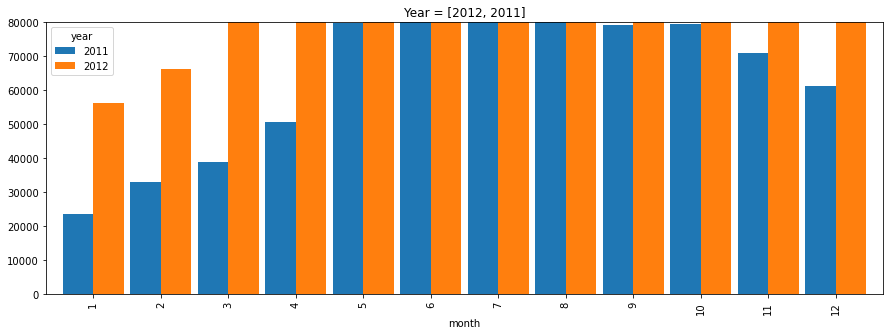

In [14]:
fun([2012,2011],df)

### 2.numerical variables

#### 2.1 descreate numerical values

In [15]:
num_variables=[x for x in df.columns if df[x].dtypes!="datetime64[ns]" and df[x].nunique()<25]
num_variables

['season', 'holiday', 'workingday', 'weather']

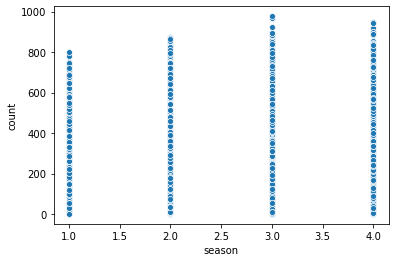

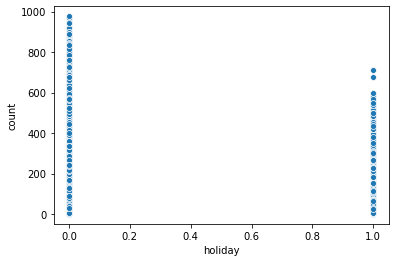

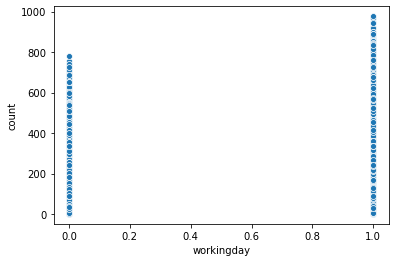

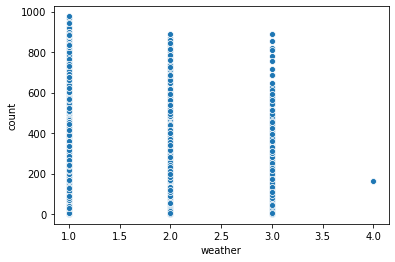

In [16]:
for i in num_variables:
    sns.scatterplot(x=i,y="count",data=df)
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

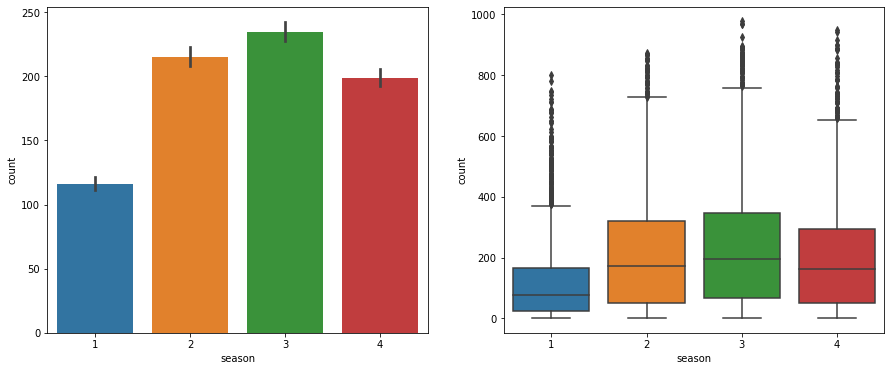

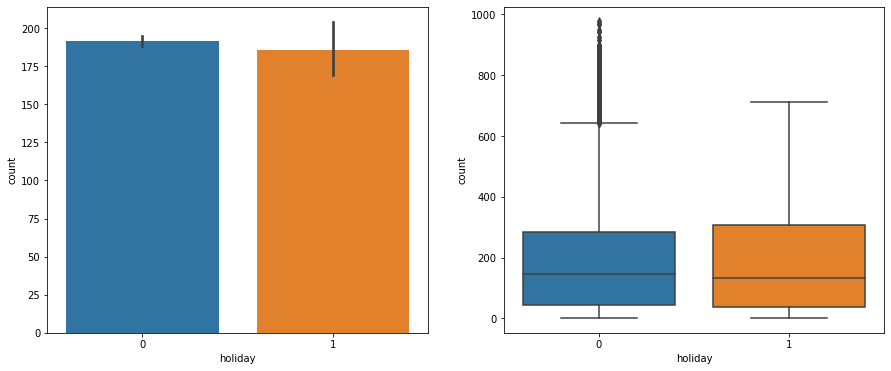

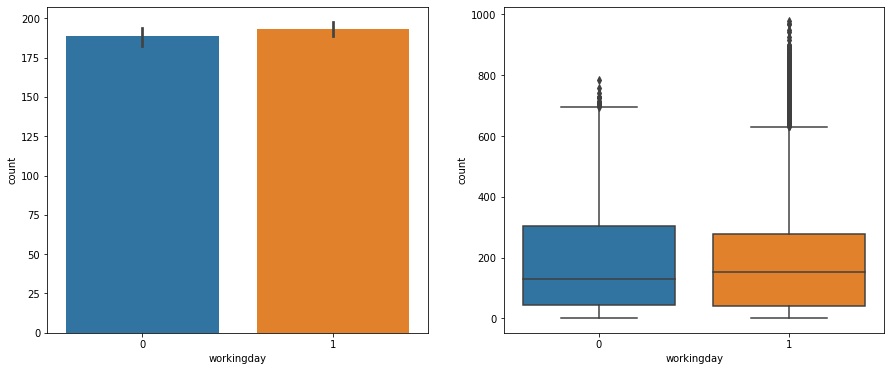

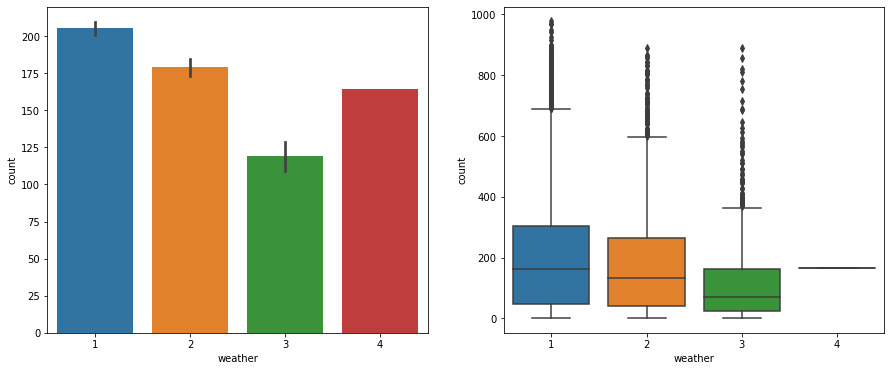

In [17]:
for i in num_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.barplot(x=i,y="count",data=df)
    plt.subplot(1,2,2)
    sns.boxplot(x=i,y="count",data=df)
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

#### 2.2 continuous numerical variables

In [18]:
cont_numerical=[x for x in df.columns if df[x].dtypes!="datetime64[ns]" and df[x].nunique()>=25]
cont_numerical

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [19]:
import scipy.stats as stat
import pylab

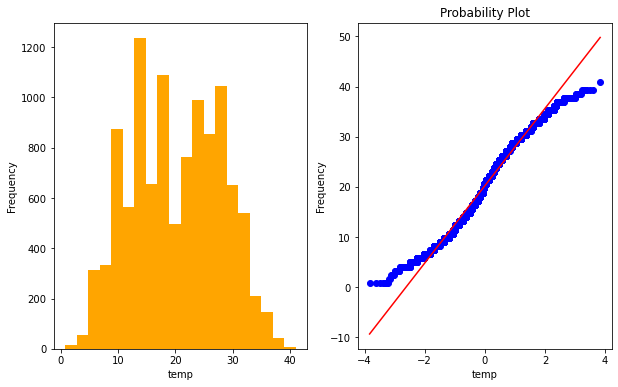

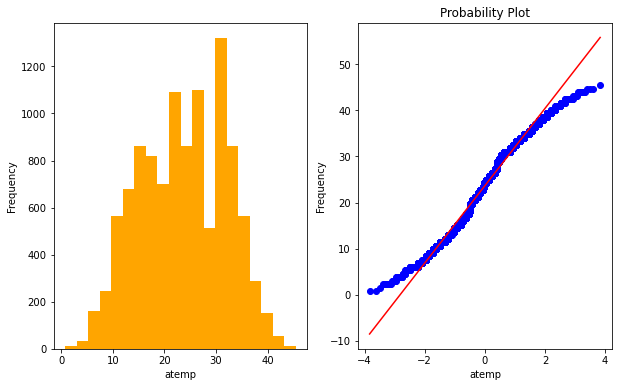

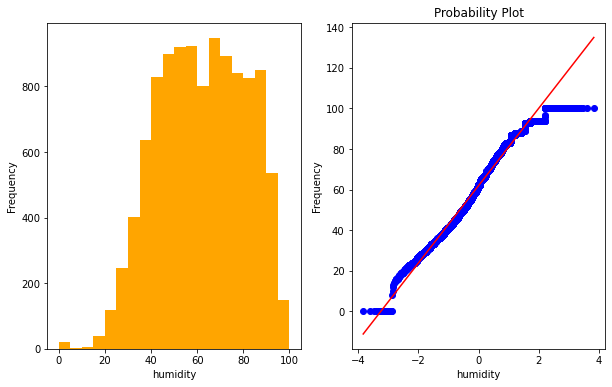

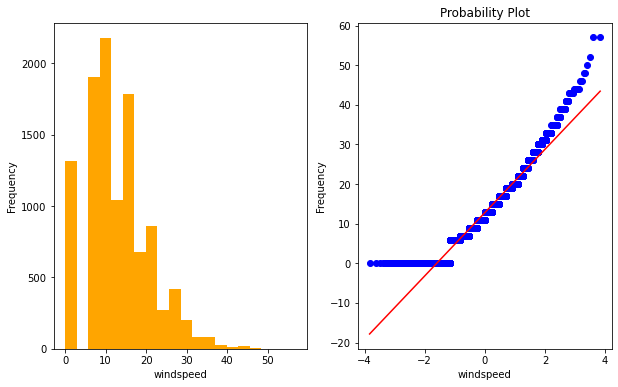

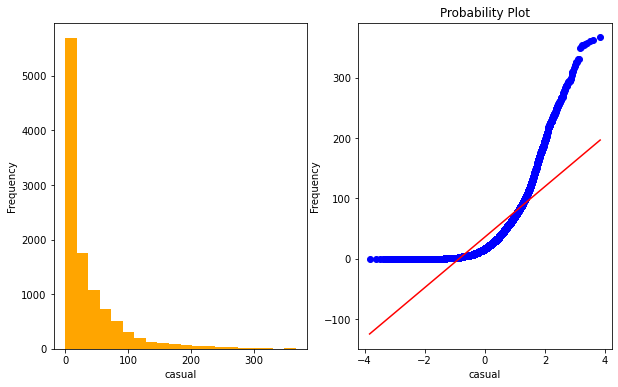

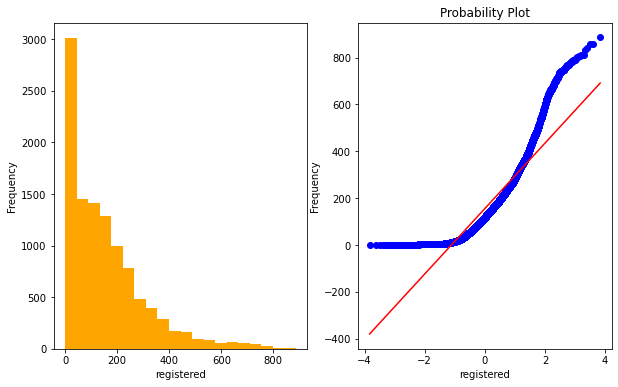

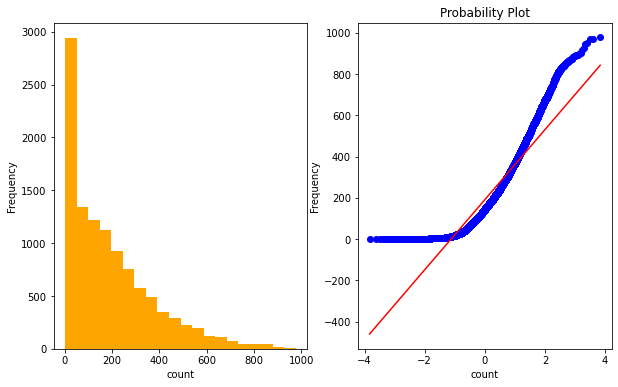

In [20]:
for i in cont_numerical:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[i].plot(kind="hist",bins=20,color="orange")
    plt.xlabel(i)
    plt.subplot(1,2,2)
    stat.probplot(df[i],dist='norm',plot=pylab)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

##### There are some right skeweness in our data

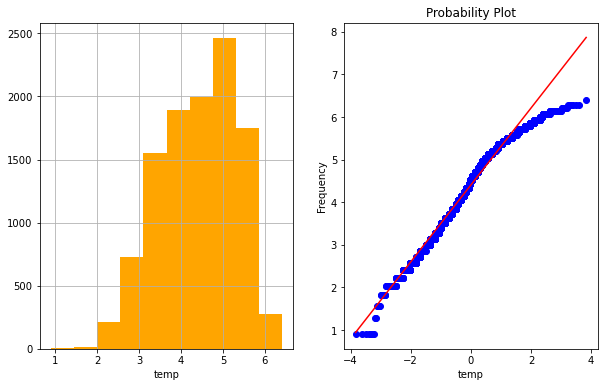

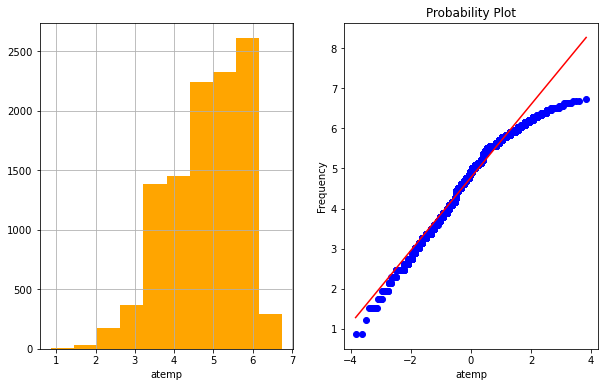

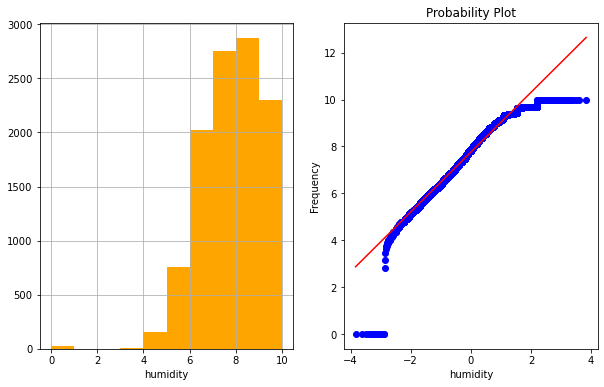

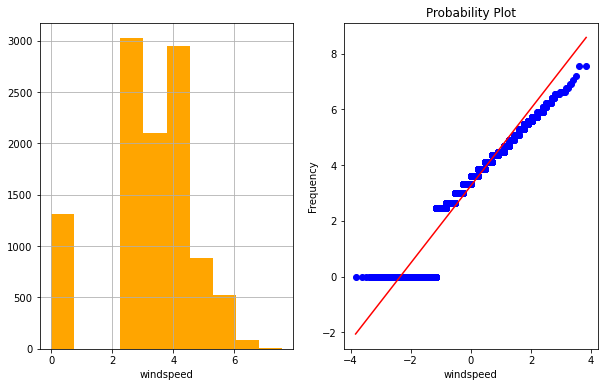

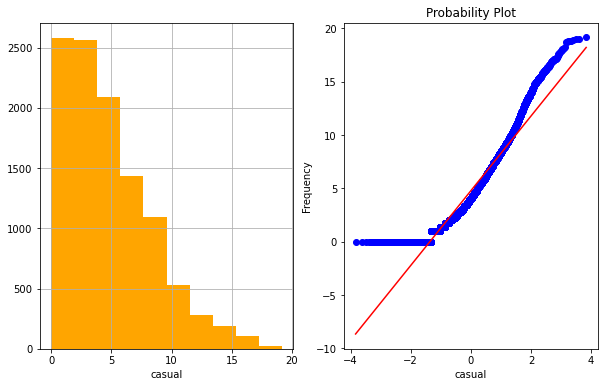

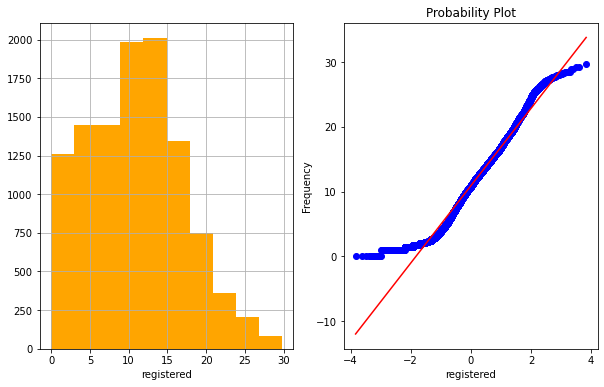

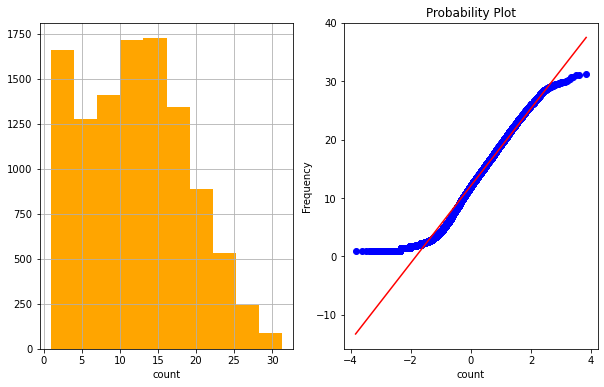

In [21]:
for i1 in cont_numerical :
    plt.figure(figsize=(10,6))
    df4=df.copy()
    df4[i1]=df[i1]**(1/2)
    plt.subplot(1,2,1)
    df4[i1].hist(bins=10,color="orange")
    plt.xlabel(i1)
    plt.subplot(1,2,2)
    stat.probplot(df4[i1],dist='norm',plot=pylab)
    plt.xlabel(i1)
    plt.ylabel("Frequency")
    plt.show()

##### we have handled skewness in our dataset

#### outlayer detection

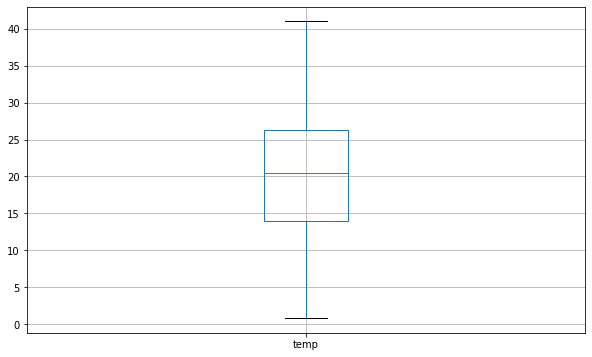

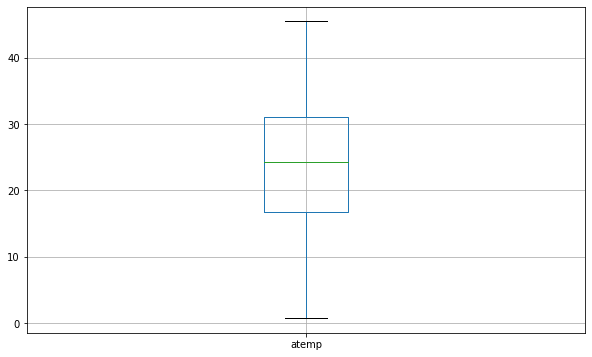

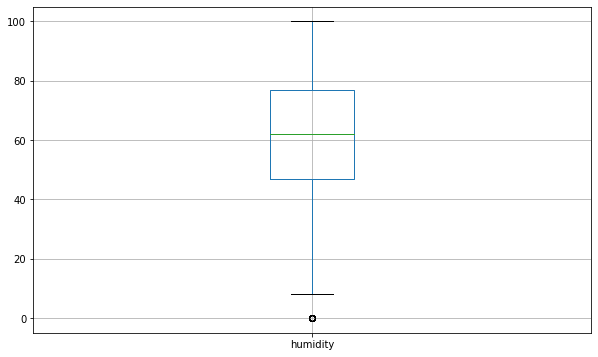

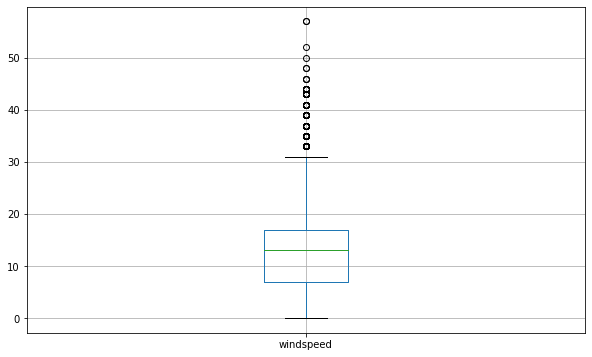

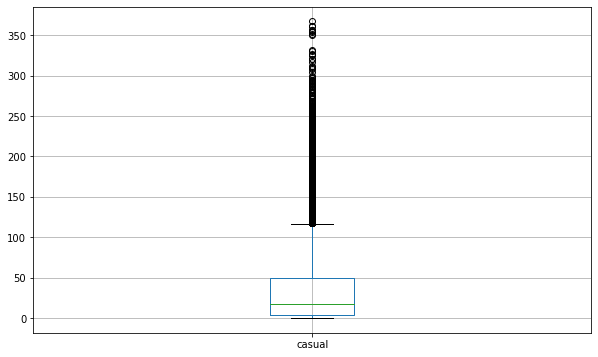

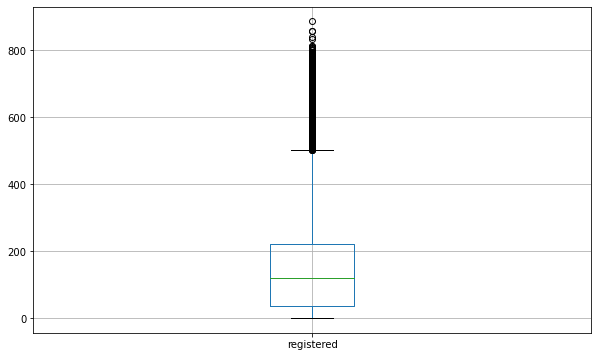

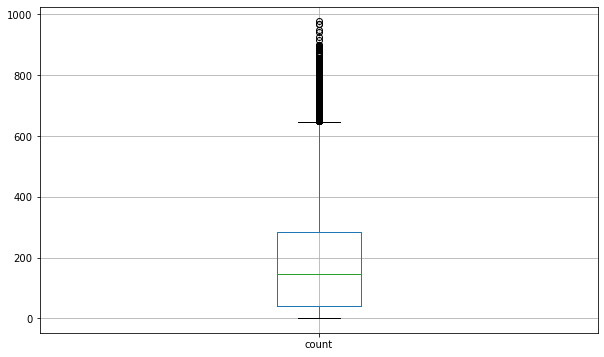

In [22]:
for i1 in cont_numerical:
    plt.figure(figsize=(10,6))
    df.boxplot(column=i1)
    plt.show()
    

##### There is some outlayers

### 3.feature engineering

#### 3.1 Normalising our data

In [23]:
data=[x for x in df.columns if df[x].nunique()>=25 and df[x].dtypes!="datetime64[ns]"]
data

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [24]:
for x in data:
    df[x]=df[x]**(1/2)    ### normalising our data using sqrt tranformation

#### 3.2 handling outlayers

In [25]:
for i in data:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[i].quantile(0.75)+(IQR*1.5)
    print(lower_bridge), print(upper_bridge)
    df.loc[df[i]>upper_bridge,[i]]=upper_bridge
    df.loc[df[i]<lower_bridge,[i]]=lower_bridge

1.6503282663778154
7.205802064087358
1.8459720626194334
7.809456630007714
3.976689919914426
11.65392906787874
0.43081049006778516
6.338075234513429
-5.5
14.5
-7.349496638627009
28.24916106437835
-9.076597573509426
32.40963781827001


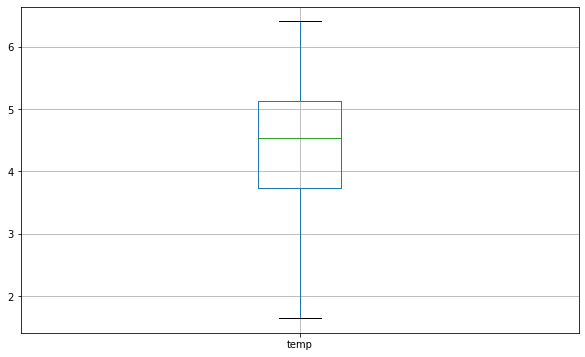

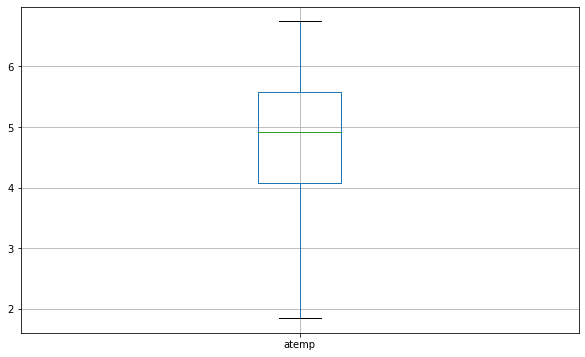

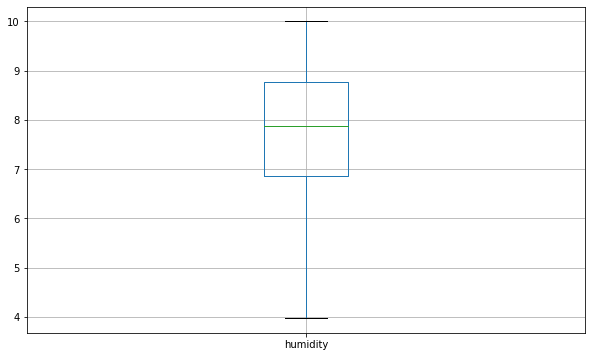

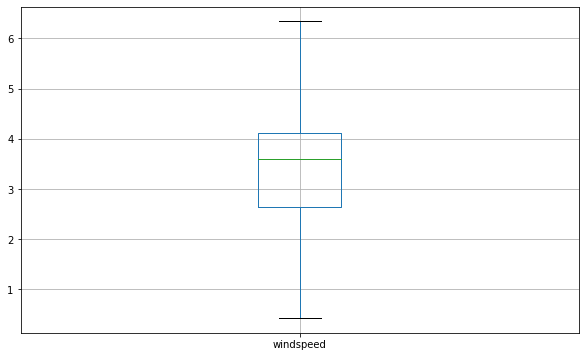

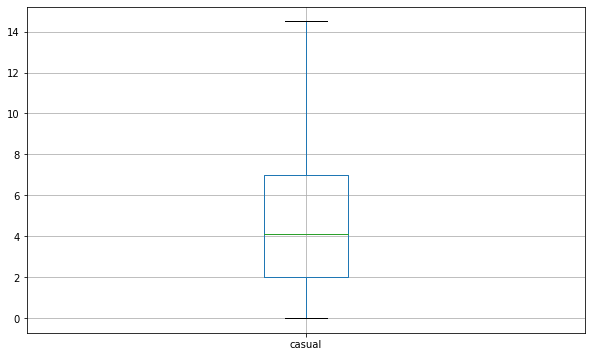

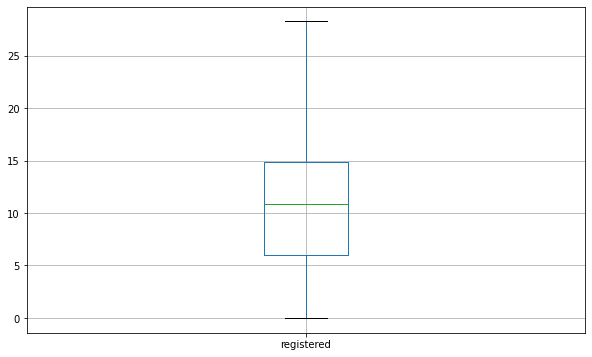

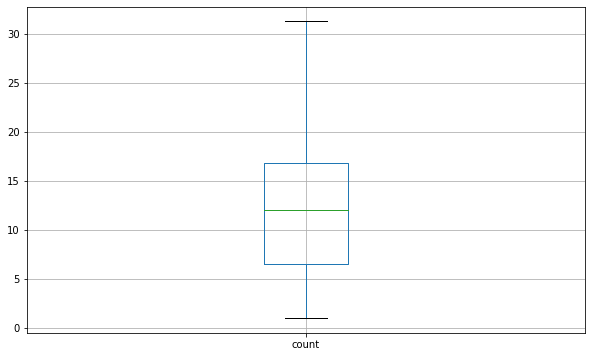

In [26]:
for y in data:
    plt.figure(figsize=(10,6))
    df.boxplot(column=y)
    plt.show()

#### 3.3 multicollinearity check

In [27]:
df["datetime"]=df.datetime.dt.hour    ### as we need only hour so we connvert datetime 

In [28]:
x=df.iloc[0:,0:11]
y=df.iloc[0:,[11]]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_scaled = scaler.fit_transform(x)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = x.columns

In [31]:
vif

VIF    Features
0    1.406692    datetime
1    1.190953      season
2    1.073279     holiday
3    1.516788  workingday
4    1.227698     weather
5   35.042004        temp
6   35.118798       atemp
7    1.707705    humidity
8    1.212154   windspeed
9    3.987833      casual
10   2.602179  registered

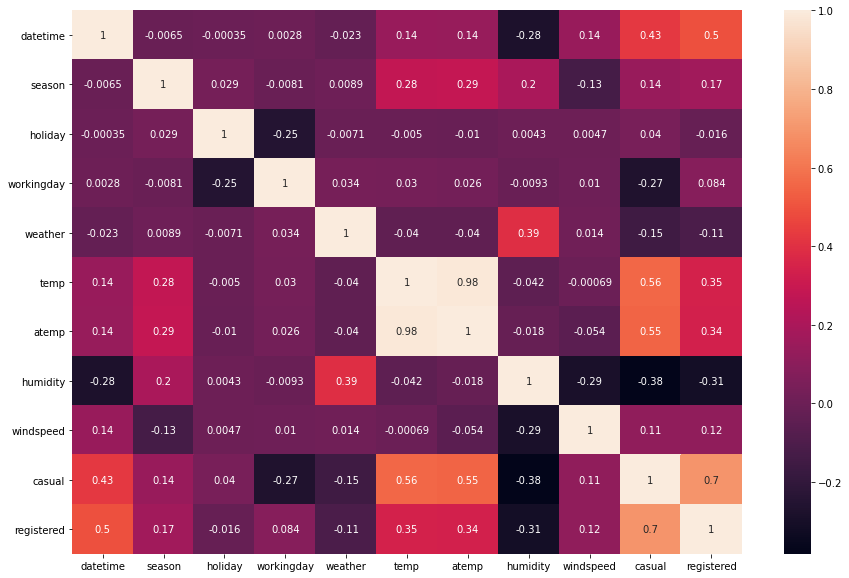

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns=["count"],axis=1).corr(),annot=True,)

#### atemp and temp are highly correleated so we must drop ony among that

#### 3.4 Feature selection

In [33]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.feature_selection import SelectFromModel

In [34]:
lasscv = LassoCV(alphas =np.logspace(-10, 1, 400),cv =15, max_iter = 100000, normalize = True)
lasscv.fit(x, y)

LassoCV(alphas=array([1.00000000e-10, 1.06553795e-10, 1.13537112e-10, 1.20978102e-10,
       1.28906759e-10, 1.37355044e-10, 1.46357012e-10, 1.55948950e-10,
       1.66169525e-10, 1.77059935e-10, 1.88664080e-10, 2.01028738e-10,
       2.14203749e-10, 2.28242224e-10, 2.43200751e-10, 2.59139630e-10,
       2.76123110e-10, 2.94219653e-10, 3.13502206e-10, 3.34048498e-10,
       3.55941352e-10, 3.79269019e-1...
       2.32228110e+00, 2.47447864e+00, 2.63665090e+00, 2.80945159e+00,
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273e+00, 9.38493086e+00, 1.00000000e+01]),
        cv=15, max_iter=100000, normalize=True)

In [35]:
alpha1=lasscv.alpha_
alpha1

2.418013084525718e-06

In [36]:
feature_sel_model = SelectFromModel(Lasso(alpha=alpha1, random_state=100)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=2.418013084525718e-06, random_state=100))

In [37]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [38]:
selected_feat = x.columns[(feature_sel_model.get_support())]
# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
   np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 11
selected features: 11
features with coefficients shrank to zero: 0


##### all the features are important but due to muticollinearity we must drop some features

#### 3.5 PCA

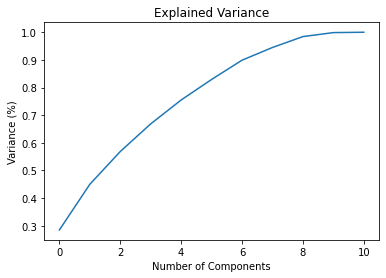

In [39]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [40]:
col=[]
for i in range(1,8):
  i=str(i)
  col.append("PCA_"+i)
pca = PCA(n_components=7)
new_data = pca.fit_transform(X_scaled)
  # This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns =col)

In [41]:
principal_Df.head()

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7
0  2.975853 -0.416519  1.386929 -1.478696  0.644850 -1.925929  0.233795
1  2.741570 -0.173887  1.400519 -1.320224  0.900748 -1.952960  0.207181
2  2.814463 -0.162111  1.370943 -1.287123  0.919575 -1.937806  0.247057
3  2.822582 -0.162688  1.353447 -1.391728  0.750592 -1.951820  0.313631
4  3.173876 -0.229980  1.302987 -1.431974  0.660708 -1.896476  0.377789

##### After performing PCA our dimention and multicollinearity has been decreased

### 4.finding average training and test accuracy using RandomForestRegressor

In [42]:
from sklearn.model_selection import KFold

In [43]:
kfold = KFold(n_splits=15,random_state= 42)
kfold.get_n_splits(principal_Df)

15

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
from sklearn.model_selection import KFold
from statistics import mean
regression = RandomForestRegressor(n_estimators = 100, random_state = 0)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(principal_Df):
    X_train, X_test = principal_Df.iloc[train_index],principal_Df.iloc[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index,0], y.iloc[test_index,0] # y is a dataframe so we have to use "iloc" to retreive data
    regression.fit(X_train,y_train)
    train_score_ = regression.score(X_train,y_train)
    test_score_ =regression.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9861543710076403 and test score is :   0.5437446011685217
for k =  2
train_score is :   0.9864819106241777 and test score is :   0.6843406150014661
for k =  3
train_score is :   0.9866761846156868 and test score is :   0.8307030025718198
for k =  4
train_score is :   0.9862274893966484 and test score is :   0.8794709836851226
for k =  5
train_score is :   0.986363653859614 and test score is :   0.8506715551121753
for k =  6
train_score is :   0.9863265963942922 and test score is :   0.8537427611542827
for k =  7
train_score is :   0.9864063208050013 and test score is :   0.8249309167290049
for k =  8
train_score is :   0.9863911292021139 and test score is :   0.787439043512619
for k =  9
train_score is :   0.9868654459005279 and test score is :   0.7108853025587749
for k =  10
train_score is :   0.9866210035698527 and test score is :   0.832555464292352
for k =  11
train_score is :   0.986320855622055 and test score is :   0.8677711058477992
for k =  12


##### This is the average train and test score for our model 

### model-1

#### decision tree regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(principal_Df,y,test_size=0.35,random_state=0)

In [48]:
regressor = DecisionTreeRegressor(random_state =10)  

In [49]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=10)

In [50]:
pred=regressor.predict(x_test)

In [51]:
regressor.score(x_train,y_train)          # train accuracy

1.0

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)                     #test accuracy

0.7582609925649652

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)                 #mean squared error

10.785857928672216

##### we got nice training and  mean squared error but test accuray is low 

#### hyper parameter tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
params={ "criterion"   :  ["mse", "friedman_mse", "mae"],
         "splitter"    :  ["best", "random"],
         "max_depth"   : [x for x in range(0,100)],
         "min_samples_split"  : [x for x in range(0,500)],
         "max_leaf_nodes" : [x for x in range(0,500)]}


In [56]:
regressor = DecisionTreeRegressor(random_state =0) 

In [57]:
random_search=RandomizedSearchCV(regressor,param_distributions=params,n_jobs=-1,cv=5,verbose=3)

In [58]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.8s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, ...],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6,
                                                           7, 8, 9, 10, 11, 12,
                                                           13, 14, 15, 16, 17,
                                                           18, 19, 20, 21, 22,
                                                     

In [59]:
random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 57,
 'max_leaf_nodes': 147,
 'max_depth': 97,
 'criterion': 'mae'}

In [60]:
random_search.best_score_

0.8018133204241508

In [61]:
regressor1 = DecisionTreeRegressor(random_state =100,splitter="best",min_samples_split=47,max_leaf_nodes=293,max_depth=56,
 criterion='mse')

In [62]:
regressor1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=56, max_leaf_nodes=293, min_samples_split=47,
                      random_state=100)

In [63]:
pred=regressor1.predict(x_test)

In [64]:
regressor1.score(x_train,y_train)          # train accuracy

0.8916711631933936

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)                     #test accuracy

0.8019759299365373

In [66]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)                 #mean squared error

8.83539445629574

##### we have increased test accuracy and decreased mean squared error

### model-2

#### X-G bosst regressor

In [67]:
import xgboost as xg

In [68]:
model2=xg.XGBRegressor(objective="reg:linear")
model2.fit(x_train,y_train)

[08:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [69]:
model2.score(x_train,y_train)    #train accuracy

0.9799596397369389

In [70]:
pred1=model2.predict(x_test)     #test accuracy
r2_score(y_test,pred1) 

0.9009374781522629

In [71]:
mean_squared_error(y_test,pred1)      #mean squared error

4.4199498378135065

#### hyper parameter tuning

In [72]:
params={
 "n_estimators"     : [x for x in range(0,200) ],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ x for x in range(0,400)],
 "min_child_weight" : [x for x in range(0,200) ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [73]:
model3=xg.XGBRegressor(objective="reg:linear")

In [74]:
random_search=RandomizedSearchCV(model3,param_distributions=params,n_jobs=-1,cv=5,verbose=3)

In [75]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.4s finished


[08:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        

In [76]:
random_search.best_params_

{'n_estimators': 64,
 'min_child_weight': 138,
 'max_depth': 149,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [77]:
random_search.best_score_

0.8820117066008202

In [78]:
model3=xg.XGBRegressor(objective="reg:linear",n_estimators=411,min_child_weight=91,max_depth=184,learning_rate=0.25,gamma=0.5,colsample_bytree=0.7)
model3.fit(x_train,y_train)

[08:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=184,
             min_child_weight=91, missing=nan, monotone_constraints='()',
             n_estimators=411, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [79]:
pred2=model3.predict(x_test)

In [80]:
model3.score(x_train,y_train)     #train score

0.9965634224423697

In [81]:
r2_score(y_test,pred2)            #test score

0.9149812843537781

In [82]:
mean_squared_error(y_test,pred2)   #mean squared error

3.7933463778482897

### BEST MODEL - XG BOOST